In [7]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ZoeLeBlanc/visualizing_humanities_data_workshop/master/web_scraped_humanist_listserv.csv")

In [3]:
df.head()

,dates,text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...


In [4]:
df = df.iloc[:21]
df['end'] = df["dates"].str.split("-").str[1]
df['start'] = df["dates"].str.split("-").str[0]
df.head()

,dates,text,end,start
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1988,1987
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1989,1988
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1990,1989
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1990
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1992,1991


In [5]:
df['volume_len']=df['text'].str.count('\n')
df.head()

,dates,text,end,start,volume_len
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1988,1987,50794
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1989,1988,36109
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1990,1989,108695
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1990,118929
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1992,1991,81193


In [6]:
def cut_words(row):
    cut_words = ""
    for token in row.text.split(" "):
        cut_words += porter.stem(token) + " "
    return cut_words
df['chopped'] = df.apply(cut_words, axis = 1)

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
listed = df.text.tolist()
vectorizer = TfidfVectorizer(max_df=.5, min_df=1, stop_words=stop_words)
fixed_list = vectorizer.fit_transform(listed)
fixed_list_as_array = fixed_list.toarray()
dates = df.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(fixed_list_as_array):
    # add everything into a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'vectorized_value']).sort_values(by='vectorized_value', ascending=False).reset_index(drop=True)
    one_doc_as_df['dates'] = dates[counter]
    tfidf_results.append(one_doc_as_df)

c:\Users\bake9\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\bake9\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\bake9\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\bake9\AppData\Local\Programs\Python\Python3

In [11]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df.head(15)

,term,vectorized_value,dates
0,utorepas,0.766377,1987-1988
1,vax,0.203525,1987-1988
2,ibycus,0.088428,1987-1988
3,cmi011,0.084506,1987-1988
4,goerwitz,0.075795,1987-1988
5,hare,0.075359,1987-1988
6,bjorndahl,0.074338,1987-1988
7,zacour,0.072432,1987-1988
8,ihnp4,0.066980,1987-1988
9,goer,0.065037,1987-1988


In [14]:
tfidf_df = tfidf_df.sort_values(by=['vectorized_value'], ascending=False)
tfidf_df.head()

,term,vectorized_value,dates
0,ninch,0.841249,2002-2003
0,ninch,0.822897,2000-2001
0,ninch,0.790522,2001-2002
0,utorepas,0.766377,1987-1988
0,ninch,0.671890,1999-2000


In [15]:
tfidf_df.term.unique()

array(['ninch', 'utorepas', 'amico', ..., 'countess', 'muscles',
       'policed'], dtype=object)

In [17]:
unique_one_five = tfidf_df.drop_duplicates(subset ="term",keep = 'first').head(15)
unique_one_five

,term,vectorized_value,dates
0,ninch,0.841249,2002-2003
0,utorepas,0.766377,1987-1988
1,amico,0.444180,1999-2000
0,fqs,0.426306,2005-2006
0,wmccarty,0.384587,2007-2008
1,fludd,0.337311,2007-2008
0,google,0.333120,2004-2005
1,elra,0.321378,1997-1998
1,wikipedia,0.316421,2005-2006
0,7848,0.301380,2003-2004


In [21]:
def plot_maker(term):
  df['count'] = df['text'].str.lower().str.count(term)
  df.plot(x = 'start', y = 'count', kind = 'line')

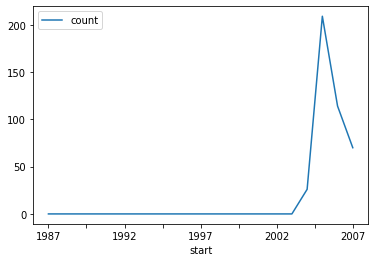

In [22]:
plot_maker("wikipedia")